In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV,BayesianRidge
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import statsmodels.formula.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
# install dmba package and import utility functions (see: https://pypi.org/project/dmba/)
import sys
#!{sys.executable} -m pip install dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import classificationSummary, gainsChart, liftChart
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
#read the dataset
data = pd.read_csv("/home/roy/Downloads/Airfares.csv")
data.head() #display the first 5 rows

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,HI,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,5291.99,28637.0,21112.0,3036732,205711,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,5419.16,26993.0,29838.0,3532657,7145897,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,9185.28,30124.0,29838.0,5787293,7145897,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,2657.35,29260.0,29838.0,7830332,7145897,Free,Free,612,25144,85.47


In [10]:
data.shape

(638, 18)

In [12]:
data.isna().sum()

S_CODE      0
S_CITY      0
E_CODE      0
E_CITY      0
COUPON      0
NEW         0
VACATION    0
SW          0
HI          0
S_INCOME    0
E_INCOME    0
S_POP       0
E_POP       0
SLOT        0
GATE        0
DISTANCE    0
PAX         0
FARE        0
dtype: int64

In [13]:
data.dtypes

S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
HI          float64
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP         int64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object

Explore the numerical predictors and response (FARE) by creating a correla-
tion table and examining some scatterplots between FARE and those predictors.
What seems to be the best single predictor of FARE?

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
COUPON,1.000000,0.020223,-0.347252,-0.088403,0.046889,-0.107763,0.094970,0.746805,-0.336974,0.496537
NEW,0.020223,1.000000,0.054147,0.026597,0.113377,-0.016672,0.058568,0.080965,0.010495,0.091730
HI,-0.347252,0.054147,1.000000,-0.027382,0.082393,-0.172495,-0.062456,-0.312375,-0.168961,0.025195
S_INCOME,-0.088403,0.026597,-0.027382,1.000000,-0.138864,0.517187,-0.272280,0.028153,0.138197,0.209135
E_INCOME,0.046889,0.113377,0.082393,-0.138864,1.000000,-0.144059,0.458418,0.176531,0.259961,0.326092
S_POP,-0.107763,-0.016672,-0.172495,0.517187,-0.144059,1.000000,-0.280143,0.018437,0.284611,0.145097
E_POP,0.094970,0.058568,-0.062456,-0.272280,0.458418,-0.280143,1.000000,0.115640,0.314698,0.285043
DISTANCE,0.746805,0.080965,-0.312375,0.028153,0.176531,0.018437,0.115640,1.000000,-0.102482,0.670016
PAX,-0.336974,0.010495,-0.168961,0.138197,0.259961,0.284611,0.314698,-0.102482,1.000000,-0.090705
FARE,0.496537,0.091730,0.025195,0.209135,0.326092,0.145097,0.285043,0.670016,-0.090705,1.000000


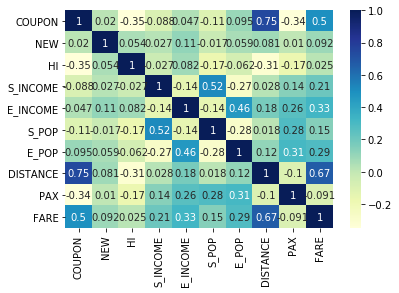

In [14]:
# check for correlation of numerical values
corr_mat = data.corr() #corr() by default picks only numerical values
display(corr_mat)
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
# displaying heatmap
plt.show()

Sort correlation values of Fare to get the best single predictor

In [15]:
corr_mat['FARE'].sort_values(ascending=False)

FARE        1.000000
DISTANCE    0.670016
COUPON      0.496537
E_INCOME    0.326092
E_POP       0.285043
S_INCOME    0.209135
S_POP       0.145097
NEW         0.091730
HI          0.025195
PAX        -0.090705
Name: FARE, dtype: float64

Scatter plot of fare with some features
 

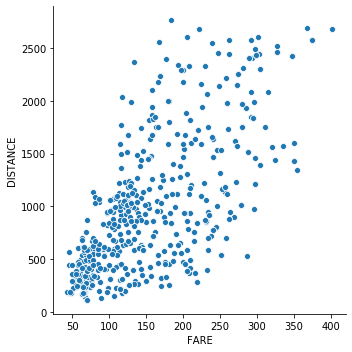

In [16]:
sns.relplot(x="FARE", y="DISTANCE", data=data)

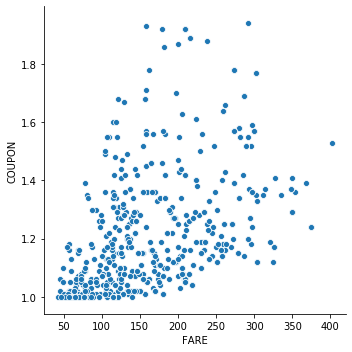

In [17]:
sns.relplot(x="FARE", y="COUPON", data=data)

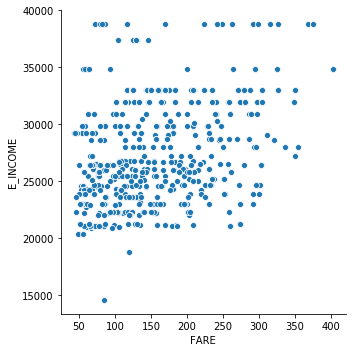

In [18]:
sns.relplot(x="FARE", y="E_INCOME", data=data)

From the above analysis The best single predictor of of fare is Distance.

Explore the categorical predictors (excluding the first four) by computing the
percentage of flights in each category. Create a pivot table with the average fare in
each category. Which categorical predictor seems best for predicting FARE?

In [20]:
#checking the categories
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   S_CODE    638 non-null    object 
 1   S_CITY    638 non-null    object 
 2   E_CODE    638 non-null    object 
 3   E_CITY    638 non-null    object 
 4   COUPON    638 non-null    float64
 5   NEW       638 non-null    int64  
 6   VACATION  638 non-null    object 
 7   SW        638 non-null    object 
 8   HI        638 non-null    float64
 9   S_INCOME  638 non-null    float64
 10  E_INCOME  638 non-null    float64
 11  S_POP     638 non-null    int64  
 12  E_POP     638 non-null    int64  
 13  SLOT      638 non-null    object 
 14  GATE      638 non-null    object 
 15  DISTANCE  638 non-null    int64  
 16  PAX       638 non-null    int64  
 17  FARE      638 non-null    float64
dtypes: float64(5), int64(5), object(8)
memory usage: 89.8+ KB


Select the categorical columns

In [21]:
cat_df = data.select_dtypes(include=['object']).copy()
cat_df.head()

,S_CODE,S_CITY,E_CODE,E_CITY,VACATION,SW,SLOT,GATE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,No,Yes,Free,Free
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,No,No,Free,Free
2,*,Boston MA,*,Baltimore/Wash Intl MD,No,No,Free,Free
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,No,Yes,Controlled,Free
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,No,Yes,Free,Free


In [22]:
#select the numerical columns
num_df=data.select_dtypes(include=['number'])
num_df.head()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
0,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864,64.11
1,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820,174.47
2,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452,207.76
3,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47
4,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47


In [23]:
vacation_output = pd.pivot_table(data=data, index=['VACATION'],values='FARE',aggfunc='mean')
sw_output = pd.pivot_table(data=data, index=['SW'],values='FARE',aggfunc='mean')
slot_output = pd.pivot_table(data=data, index=['SLOT'],values='FARE',aggfunc='mean')
gate_output = pd.pivot_table(data=data, index=['GATE'],values='FARE',aggfunc='mean')
display(vacation_output)
display(sw_output)
display(slot_output)
display(gate_output)

,FARE
VACATION,
No,173.552500
Yes,125.980882


,FARE
SW,
No,188.182793
Yes,98.382268


,FARE
SLOT,
Controlled,186.059396
Free,150.825680


,FARE
GATE,
Constrained,193.129032
Free,153.095953


In [24]:
display(data['VACATION'].value_counts())
display(data['SW'].value_counts())
display(data['SLOT'].value_counts())
display(data['GATE'].value_counts())

No     468
Yes    170
Name: VACATION, dtype: int64

No     444
Yes    194
Name: SW, dtype: int64

Free          456
Controlled    182
Name: SLOT, dtype: int64

Free           514
Constrained    124
Name: GATE, dtype: int64

SW seems to be a good predictor of FARE since there is is a big difference in its mean.

Find a model for predicting the average fare on a new route:

In [25]:
cat_dummies = pd.get_dummies(data[['VACATION', 'SW', 'SLOT', 'GATE']],drop_first=True)#creates (n-1) dummies
cat_dummies.head()

,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
0,0,1,1,1
1,0,0,1,1
2,0,0,1,1
3,0,1,0,1
4,0,1,1,1


Concat dummies dataframeand Categorical dataframe

In [26]:
##concat two dataframes
frames = [num_df, cat_dummies]
full_df = pd.concat(frames, axis=1)
full_df.head()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
0,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864,64.11,0,1,1,1
1,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820,174.47,0,0,1,1
2,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452,207.76,0,0,1,1
3,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47,0,1,0,1
4,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,85.47,0,1,1,1


Getting X features and Y variables 

In [28]:
X = full_df.drop('FARE', axis=1)
y = full_df['FARE']
display(X.head())
display(y.head())

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
0,1.00,3,5291.99,28637.0,21112.0,3036732,205711,312,7864,0,1,1,1
1,1.06,3,5419.16,26993.0,29838.0,3532657,7145897,576,8820,0,0,1,1
2,1.06,3,9185.28,30124.0,29838.0,5787293,7145897,364,6452,0,0,1,1
3,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,0,1,0,1
4,1.06,3,2657.35,29260.0,29838.0,7830332,7145897,612,25144,0,1,1,1


0     64.11
1    174.47
2    207.76
3     85.47
4     85.47
Name: FARE, dtype: float64

split the data into training and validation dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)

In [31]:
X_train.shape

(382, 13)

In [32]:
X_train.columns

Index(['COUPON', 'NEW', 'HI', 'S_INCOME', 'E_INCOME', 'S_POP', 'E_POP',
       'DISTANCE', 'PAX', 'VACATION_Yes', 'SW_Yes', 'SLOT_Free', 'GATE_Free'],
      dtype='object')

Stepwise Regression

In [38]:
# Forward Selection
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y_train, [y_train.mean()] * len(y_train), model, df=1)
    return AIC_score(y_train, model.predict(X_train[variables]), model)
best_model, best_variables = forward_selection(X_train.columns, train_model,score_model, verbose=True)
print(best_variables)

Variables: COUPON, NEW, HI, S_INCOME, E_INCOME, S_POP, E_POP, DISTANCE, PAX, VACATION_Yes, SW_Yes, SLOT_Free, GATE_Free
Start: score=4398.15, constant
Step: score=4200.73, add DISTANCE
Step: score=4077.44, add SW_Yes
Step: score=3955.31, add VACATION_Yes
Step: score=3926.23, add HI
Step: score=3907.43, add SLOT_Free
Step: score=3874.69, add GATE_Free
Step: score=3871.05, add PAX
Step: score=3863.40, add E_INCOME
Step: score=3855.76, add S_POP
Step: score=3841.60, add E_POP
Step: score=3840.20, add NEW
Step: score=3840.20, add None
['DISTANCE', 'SW_Yes', 'VACATION_Yes', 'HI', 'SLOT_Free', 'GATE_Free', 'PAX', 'E_INCOME', 'S_POP', 'E_POP', 'NEW']


In [39]:
step_pred = best_model.predict(X_test[['DISTANCE', 'SW_Yes', 'VACATION_Yes','HI', 'SLOT_Free', 'GATE_Free', 'PAX',
                                       'E_INCOME', 'S_POP', 'E_POP', 'NEW']])

Exhaustive Search

In [43]:
# Run an exhaustive search.
def train_model(variables):
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    pred_y = model.predict(X_train[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(y_train, pred_y, model)

allVariables = X_train.columns
results = exhaustive_search(allVariables, train_model, score_model)
data = []

for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(y_train, model.predict(X_train[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
    
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC')+tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj          AIC  COUPON  DISTANCE  E_INCOME  E_POP  GATE_Free     HI    NEW    PAX  \
0    1  0.405135  4200.729600   False      True     False  False      False  False  False  False   
1    2  0.570346  4077.437454   False      True     False  False      False  False  False  False   
2    3  0.688723  3955.311141   False      True     False  False      False  False  False  False   
3    4  0.712287  3926.228512   False      True     False  False      False   True  False  False   
4    5  0.726808  3907.429694   False      True     False  False      False   True  False  False   
5    6  0.749890  3874.691826   False      True     False  False       True   True  False  False   
6    7  0.752901  3871.045067   False      True     False  False       True   True  False   True   
7    8  0.758415  3863.401736   False      True      True  False       True   True  False   True   
8    9  0.767568  3849.622765   False      True     False   True       True   True  False   True   


In [44]:
exhaustive_pred = model.predict(X_test)

Comparing the two models

In [45]:
#calculate RMSE
print(f"Stepwise model validation score: {sqrt(mean_squared_error(y_test,step_pred)):.2f}")
print(f"Exhaustive model validation score: {sqrt(mean_squared_error(y_test,exhaustive_pred)):.2f}")

Stepwise model validation score: 35.16
Exhaustive model validation score: 34.97


Exhaustive Search model performs better than Stepwise model since Exhaustive model
has a smaller RMSE of 34.97 while Stepwise has RMSE of 35.16

In [46]:
X_test.head()

,COUPON,NEW,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
260,1.29,3,3152.00,21081.0,32991.0,895123,8621121,613,3806,0,0,0,1
228,1.00,3,2850.33,30124.0,32991.0,5787293,8621121,183,66820,0,0,1,0
31,1.34,0,2587.89,32991.0,18851.0,8621121,254153,637,6003,0,0,0,1
583,1.07,3,3289.86,24502.0,31981.0,125722,4549784,310,6583,0,0,1,1
600,1.33,3,3680.60,24706.0,31981.0,9056076,4549784,2300,20007,0,0,0,1


arange values to predict as it is on X_train dataframe

In [48]:
to_predict = np.array([1.202, 3, 4442.141, 28760, 27664, 4_557_004, 3_195_503,
            1976, 12_782, 0, 0, 1, 1]).reshape(1,-1)

In [49]:
model.predict(to_predict)

array([245.65056087])

Change SW ti 1

In [50]:
to_predict = np.array([1.202, 3, 4442.141, 28760, 27664, 4_557_004, 3_195_503,
1976, 12_782, 0, 1, 1, 1]).reshape(1,-1)

In [51]:
model.predict(to_predict)

array([205.61652681])

In [52]:
X_train = X_train.drop(['NEW', 'PAX'], axis=1)
X_test = X_test.drop(['NEW', 'PAX'], axis=1)

In [56]:
# Run an exhaustive search.
def train_model(variables):
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

def score_model(model, variables):
    pred_y = model.predict(X_train[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(y_train, pred_y, model)
allVariables = X_train.columns
results = exhaustive_search(allVariables, train_model, score_model)
data = []

for result in results:
    model_1 = result['model']
    variables = result['variables']
    AIC = AIC_score(y_train, model_1.predict(X_train[variables]), model_1)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
    
pd.set_option('display.width', 100)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') +tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj          AIC  COUPON  DISTANCE  E_INCOME  E_POP  GATE_Free     HI  SLOT_Free  \
0    1  0.405135  4200.729600   False      True     False  False      False  False      False   
1    2  0.570346  4077.437454   False      True     False  False      False  False      False   
2    3  0.688723  3955.311141   False      True     False  False      False  False      False   
3    4  0.712287  3926.228512   False      True     False  False      False   True      False   
4    5  0.726808  3907.429694   False      True     False  False      False   True       True   
5    6  0.749890  3874.691826   False      True     False  False       True   True       True   
6    7  0.752010  3872.419699   False      True      True  False       True   True       True   
7    8  0.754619  3869.357355   False      True     False   True       True   True       True   
8    9  0.755916  3868.306717    True      True     False   True       True   True       True   
9   10  0.757843  3866.251796 

In [57]:
X_test.head()

,COUPON,HI,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,VACATION_Yes,SW_Yes,SLOT_Free,GATE_Free
260,1.29,3152.00,21081.0,32991.0,895123,8621121,613,0,0,0,1
228,1.00,2850.33,30124.0,32991.0,5787293,8621121,183,0,0,1,0
31,1.34,2587.89,32991.0,18851.0,8621121,254153,637,0,0,0,1
583,1.07,3289.86,24502.0,31981.0,125722,4549784,310,0,0,1,1
600,1.33,3680.60,24706.0,31981.0,9056076,4549784,2300,0,0,0,1


In [58]:
to_predict = np.array([1.202, 4442.141, 28_760, 27_664, 4_557_004, 3_195_503,
                       1976, 0, 0, 1, 1]).reshape(1, -1)

In [59]:
model_1.predict(to_predict)

array([244.12575045])